In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [6]:
# Create new time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['IsHolidayWeek'] = df['Holiday_Flag'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

In [8]:
df.isnull().sum()

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
Year             0
Month            0
Week             0
Day              0
IsHolidayWeek    0
dtype: int64

In [14]:
# Detect basic outliers in Weekly_Sales using IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Weekly_Sales'] < Q1 - 1.5 * IQR) | (df['Weekly_Sales'] > Q3 + 1.5 * IQR)]
outliers

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,IsHolidayWeek
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163,2010,12,51,24,Non-Holiday
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441,2011,12,51,23,Non-Holiday
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127,2010,11,47,26,Holiday
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127,2010,12,50,17,Non-Holiday
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127,2010,12,51,24,Non-Holiday
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143,2011,11,47,25,Holiday
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143,2011,12,50,16,Non-Holiday
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,2011,12,51,23,Non-Holiday
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007,2010,12,51,24,Non-Holiday
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003,2010,11,47,26,Holiday


In [11]:
df.sort_values(by = ['Store', 'Date'], inplace = True)

In [16]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,IsHolidayWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,Non-Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,Holiday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,Non-Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,Non-Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,Non-Holiday
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,12,Non-Holiday
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,19,Non-Holiday
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,26,Non-Holiday
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,13,2,Non-Holiday
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,14,9,Non-Holiday


In [17]:
outliers.shape[0]

34

C:\Users\dell\AppData\Local\Temp\ipykernel_19300\1317641029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_per_store.index, y=avg_sales_per_store.values, palette='coolwarm')


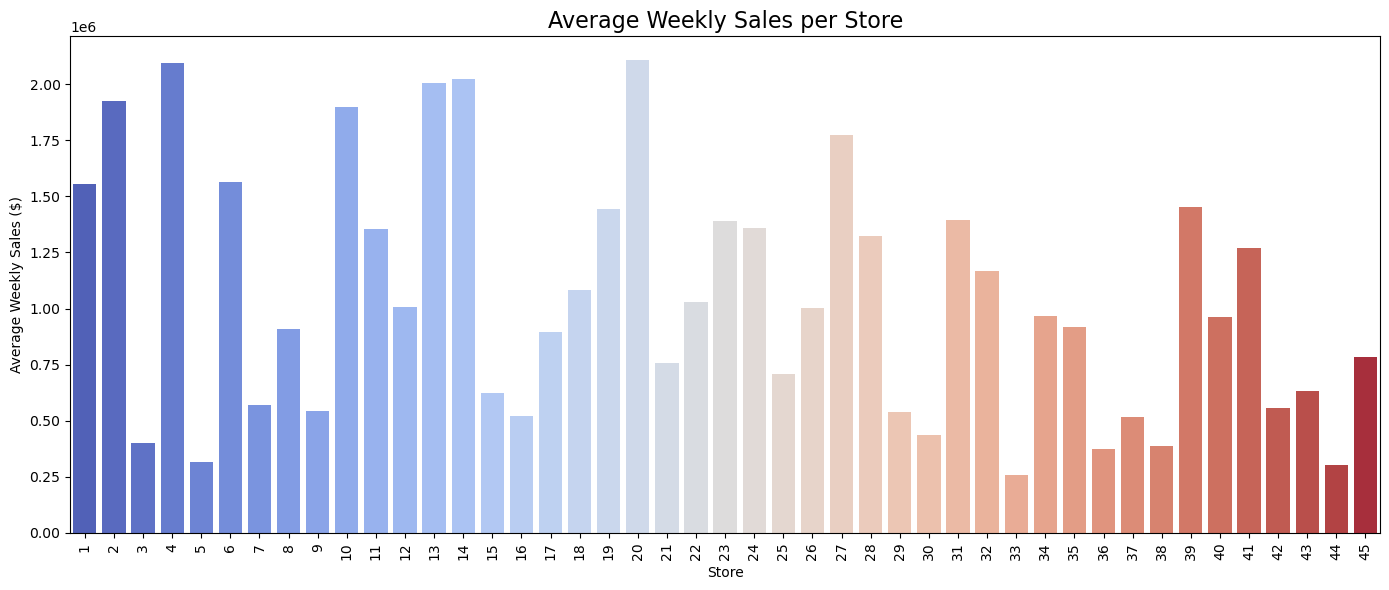

In [19]:
# Compute average sales per store
avg_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_sales_per_store.index, y=avg_sales_per_store.values, palette='coolwarm')
plt.title("Average Weekly Sales per Store", fontsize=16)
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_19300\3320987682.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='viridis')


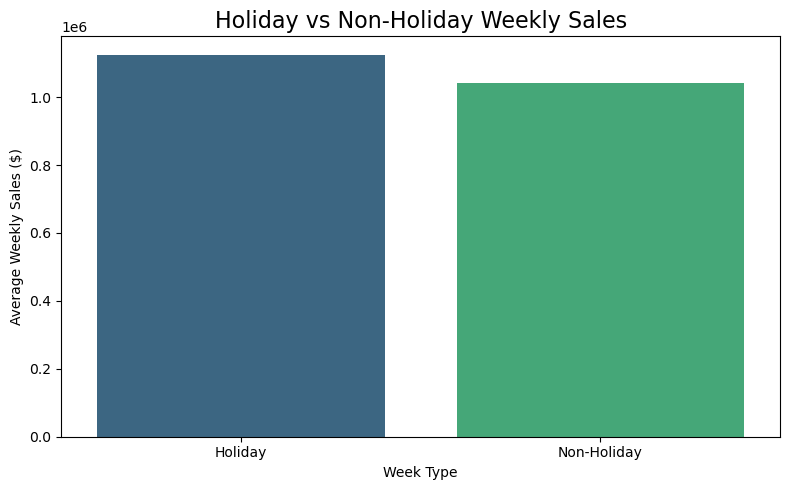

In [21]:
# Holiday vs Non-Holiday Weekly Sales (Bar Plot)

# Group by holiday flag
holiday_sales = df.groupby('IsHolidayWeek')['Weekly_Sales'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='viridis')
plt.title("Holiday vs Non-Holiday Weekly Sales", fontsize=16)
plt.xlabel("Week Type")
plt.ylabel("Average Weekly Sales ($)")
plt.tight_layout()
plt.show()


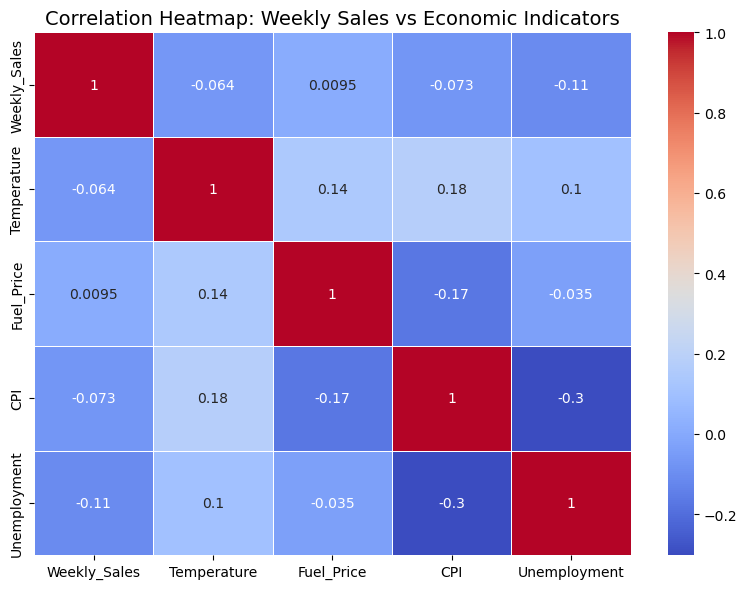

In [23]:
# Correlation Heatmap between sales and external factors

# Select relevant numeric columns
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Weekly Sales vs Economic Indicators", fontsize=14)
plt.tight_layout()
plt.show()

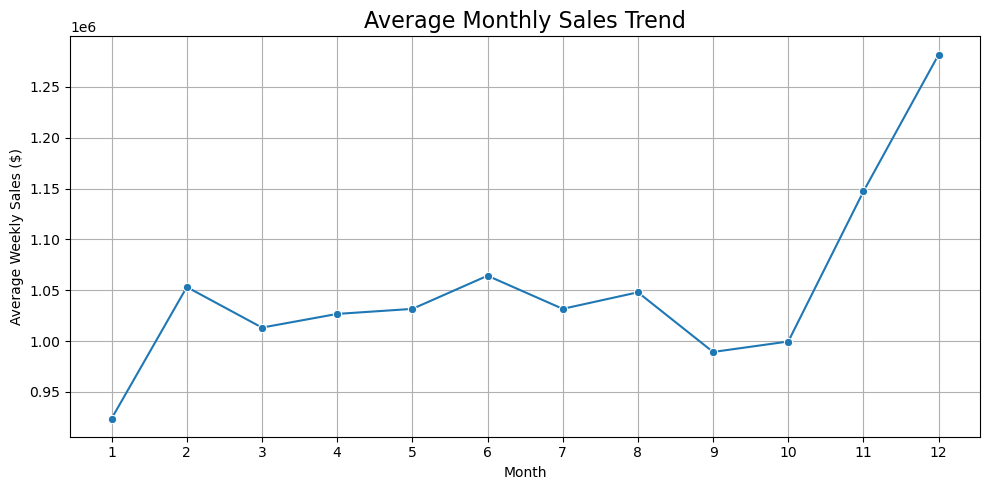

In [24]:
# Monthly Sales Trend (Seasonality)
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Average Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales ($)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

# SARIMA (Store 1) forecasting

In [41]:
# Filter for Store 1
store1 = df[df['Store'] == 1].sort_values("Date")
store1.set_index("Date", inplace=True)

# Extract weekly sales
sales = store1['Weekly_Sales']
sales.head()

Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [42]:
# Last 12 weeks as test set
train = sales[:-12]
test = sales[-12:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 131
Test size: 12


In [45]:
# SARIMA model with weekly seasonality (52 weeks ~ yearly cycle)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))
results = model.fit(disp=False)

results.summary()

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  131
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -991.968
Date:                            Wed, 20 Aug 2025   AIC                           1993.936
Time:                                    14:49:20   BIC                           2005.720
Sample:                                02-05-2010   HQIC                          1998.653
                                     - 08-03-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2029      0.451      0.450      0.653      -0.681       1.087
ma.L1         -0.3750      0.439     -0.854      0.393      -1.236       0.486
ar.S.L52       0.6442      0.113      5.722      0.000       0.424       0.865
ma.S.L52      -0.9998      0.161     -6.195      0.000      -1.316      -0.683
sigma2      5.404e+09   2.99e-11   1.81e+20      0.000     5.4e+09     5.4e+09
===================================================================================
Ljung-Box (L1) (Q):                   9.04   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               2.00   Skew:                             0.13
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+37. Standard errors may be unstable.
"""

In [44]:
forecast = results.get_forecast(steps=12)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

pred

2012-08-10    1.555296e+06
2012-08-17    1.561706e+06
2012-08-24    1.506071e+06
2012-08-31    1.579055e+06
2012-09-07    1.569551e+06
2012-09-14    1.544566e+06
2012-09-21    1.433588e+06
2012-09-28    1.450610e+06
2012-10-05    1.641581e+06
2012-10-12    1.529638e+06
2012-10-19    1.530700e+06
2012-10-26    1.487204e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

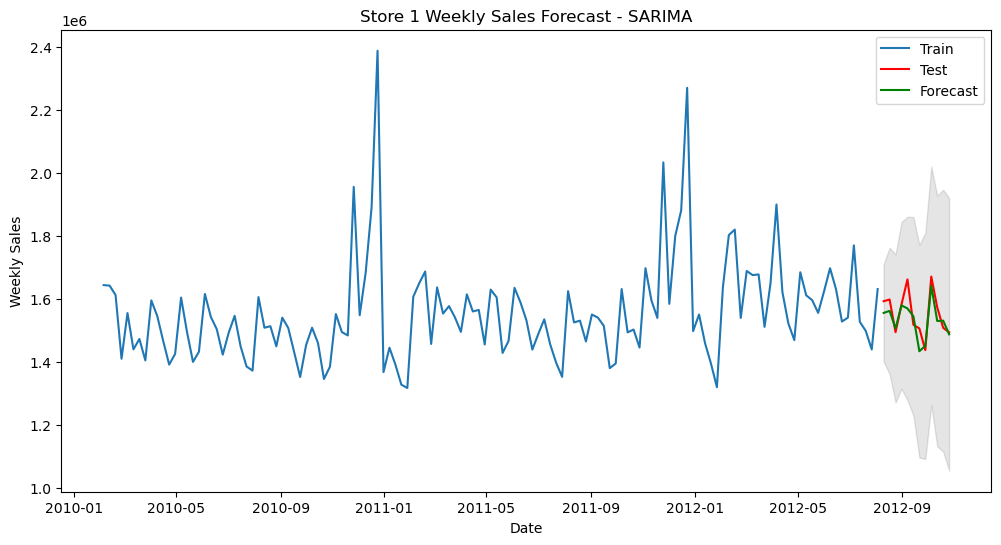

In [46]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="red")
plt.plot(test.index, pred, label="Forecast", color="green")
plt.fill_between(test.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color="k", alpha=0.1)
plt.title("Store 1 Weekly Sales Forecast - SARIMA")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [47]:
rmse = np.sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 41649.31921025983
MAE: 32951.70604880018


In [48]:
# Holt-Winters model (trend + seasonality)
hw_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52)
hw_fit = hw_model.fit()

C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\dell\3D Objects\anaconda setup\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [49]:
hw_forecast = hw_fit.forecast(12)
hw_forecast

2012-08-10    1.628499e+06
2012-08-17    1.634518e+06
2012-08-24    1.570873e+06
2012-08-31    1.661449e+06
2012-09-07    1.633779e+06
2012-09-14    1.566908e+06
2012-09-21    1.475683e+06
2012-09-28    1.560273e+06
2012-10-05    1.655152e+06
2012-10-12    1.586717e+06
2012-10-19    1.497456e+06
2012-10-26    1.514339e+06
Freq: W-FRI, dtype: float64

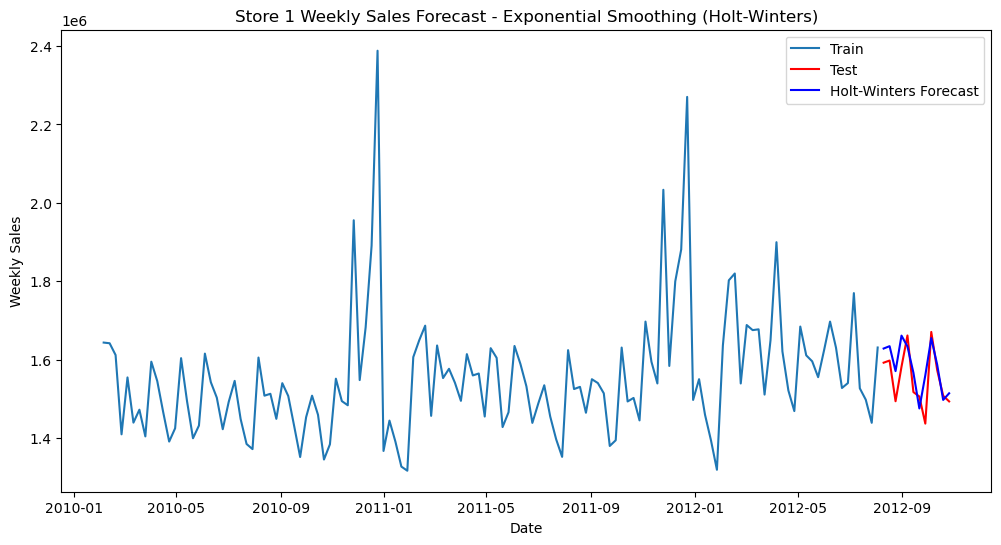

In [50]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="red")
plt.plot(test.index, hw_forecast, label="Holt-Winters Forecast", color="blue")
plt.title("Store 1 Weekly Sales Forecast - Exponential Smoothing (Holt-Winters)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [51]:
hw_rmse = np.sqrt(mean_squared_error(test, hw_forecast))
hw_mae = mean_absolute_error(test, hw_forecast)

print("Holt-Winters RMSE:", hw_rmse)
print("Holt-Winters MAE:", hw_mae)

Holt-Winters RMSE: 54118.550201305814
Holt-Winters MAE: 43378.99685946751


In [52]:
# Prepare data for Prophet (must be ds, y format)
prophet_df = store1.reset_index()[['Date', 'Weekly_Sales']]
prophet_df.rename(columns={'Date':'ds', 'Weekly_Sales':'y'}, inplace=True)

In [53]:
prophet_train = prophet_df.iloc[:-12]
prophet_test = prophet_df.iloc[-12:]

In [54]:
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_train)

14:52:32 - cmdstanpy - INFO - Chain [1] start processing
14:52:33 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = prophet_model.make_future_dataframe(periods=12, freq='W')
forecast = prophet_model.predict(future)

forecast.tail(12)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
131,2012-08-05,1.567620e+06,1.437096e+06,1.710111e+06
132,2012-08-12,1.596592e+06,1.453066e+06,1.736067e+06
133,2012-08-19,1.625316e+06,1.489233e+06,1.774299e+06
134,2012-08-26,1.635687e+06,1.500642e+06,1.775173e+06
135,2012-09-02,1.610618e+06,1.477488e+06,1.753719e+06
136,2012-09-09,1.559470e+06,1.425533e+06,1.692196e+06
137,2012-09-16,1.520069e+06,1.381525e+06,1.654671e+06
138,2012-09-23,1.523790e+06,1.372970e+06,1.658715e+06
139,2012-09-30,1.559241e+06,1.424264e+06,1.705832e+06
140,2012-10-07,1.581577e+06,1.441646e+06,1.730920e+06


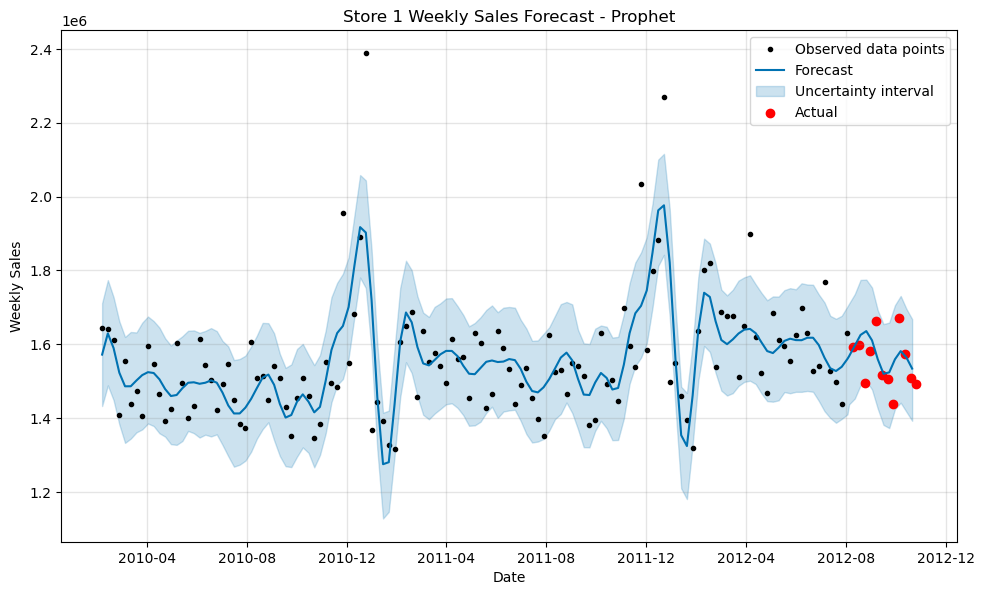

In [56]:
fig = prophet_model.plot(forecast)
plt.scatter(prophet_test['ds'], prophet_test['y'], color='red', label='Actual')
plt.title("Store 1 Weekly Sales Forecast - Prophet")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [57]:
prophet_pred = forecast.iloc[-12:]['yhat']

prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_pred))
prophet_mae = mean_absolute_error(prophet_test['y'], prophet_pred)

print("Prophet RMSE:", prophet_rmse)
print("Prophet MAE:", prophet_mae)

Prophet RMSE: 64612.44232333377
Prophet MAE: 51774.29987883312


In [58]:
# Create comparison table
results = pd.DataFrame({
    "Model": ["SARIMA", "Holt-Winters", "Prophet"],
    "RMSE": [rmse, hw_rmse, prophet_rmse],
    "MAE": [mae, hw_mae, prophet_mae]
})
results

,Model,RMSE,MAE
0,SARIMA,41649.319210,32951.706049
1,Holt-Winters,54118.550201,43378.996859
2,Prophet,64612.442323,51774.299879


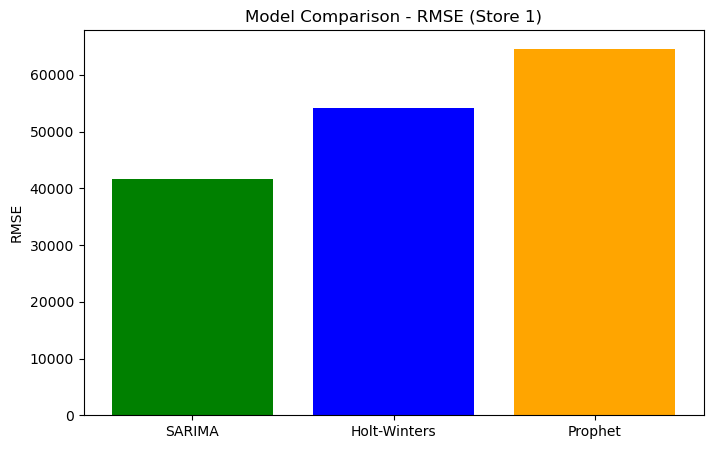

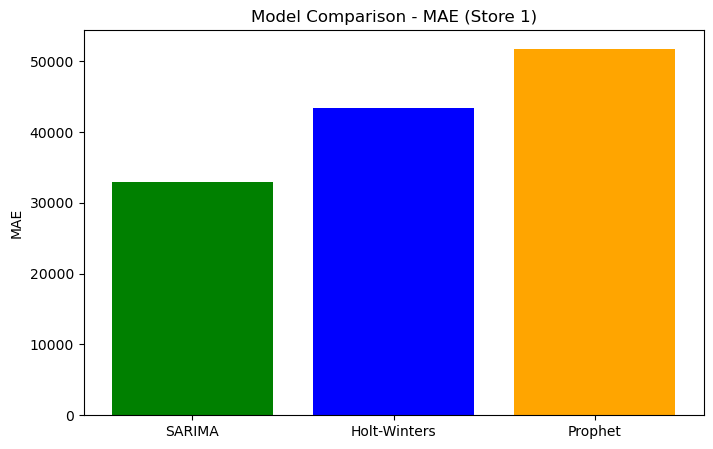

In [59]:
# Plot RMSE comparison
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["RMSE"], color=['green','blue','orange'])
plt.title("Model Comparison - RMSE (Store 1)")
plt.ylabel("RMSE")
plt.show()

# Plot MAE comparison
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["MAE"], color=['green','blue','orange'])
plt.title("Model Comparison - MAE (Store 1)")
plt.ylabel("MAE")
plt.show()

# Machine Learning (All Stores Together)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Rename target
target = "Weekly_Sales"

# Select features
features = ['Store', 'Year', 'Month', 'Week', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

X = df[features]
y = df[target]

In [65]:
# Sort data by date for proper split
df = df.sort_values("Date")

# Train until last 12 weeks, test = last 12 weeks
train_df = df[df['Date'] < df['Date'].max() - pd.Timedelta(weeks=12)]
test_df  = df[df['Date'] >= df['Date'].max() - pd.Timedelta(weeks=12)]

In [66]:
X_train = train_df[features]
y_train = train_df[target]
X_test  = test_df[features]
y_test  = test_df[target]

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (5850, 9) Test size: (585, 9)


In [71]:
# One-hot encode Store ID
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[['Store']])
X_test_encoded  = encoder.transform(X_test[['Store']])

In [72]:
# Convert back to DataFrame and merge with other features
encoded_cols = [f"Store_{cat}" for cat in encoder.categories_[0]]

X_train_final = pd.concat([
    X_train.drop(columns=['Store']).reset_index(drop=True),
    pd.DataFrame(X_train_encoded, columns=encoded_cols)
], axis=1)

X_test_final = pd.concat([
    X_test.drop(columns=['Store']).reset_index(drop=True),
    pd.DataFrame(X_test_encoded, columns=encoded_cols)
], axis=1)

print("Final Train Shape:", X_train_final.shape)
print("Final Test Shape:", X_test_final.shape)

Final Train Shape: (5850, 53)
Final Test Shape: (585, 53)


In [74]:
linreg = LinearRegression()
linreg.fit(X_train_final, y_train)

print("Trained Linear Regression.")

Trained Linear Regression.


In [75]:
y_pred_lr = linreg.predict(X_test_final)
print("Predictions ready. Shape:", y_pred_lr.shape)

Predictions ready. Shape: (585,)


In [77]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae  = mean_absolute_error(y_test, y_pred_lr)
lr_r2   = r2_score(y_test, y_pred_lr)

print("Linear Regression — RMSE:", lr_rmse)
print("Linear Regression — MAE :", lr_mae)
print("Linear Regression — R²  :", lr_r2)

Linear Regression — RMSE: 132008.65095655603
Linear Regression — MAE : 98948.4847291425
Linear Regression — R²  : 0.9374362746502761


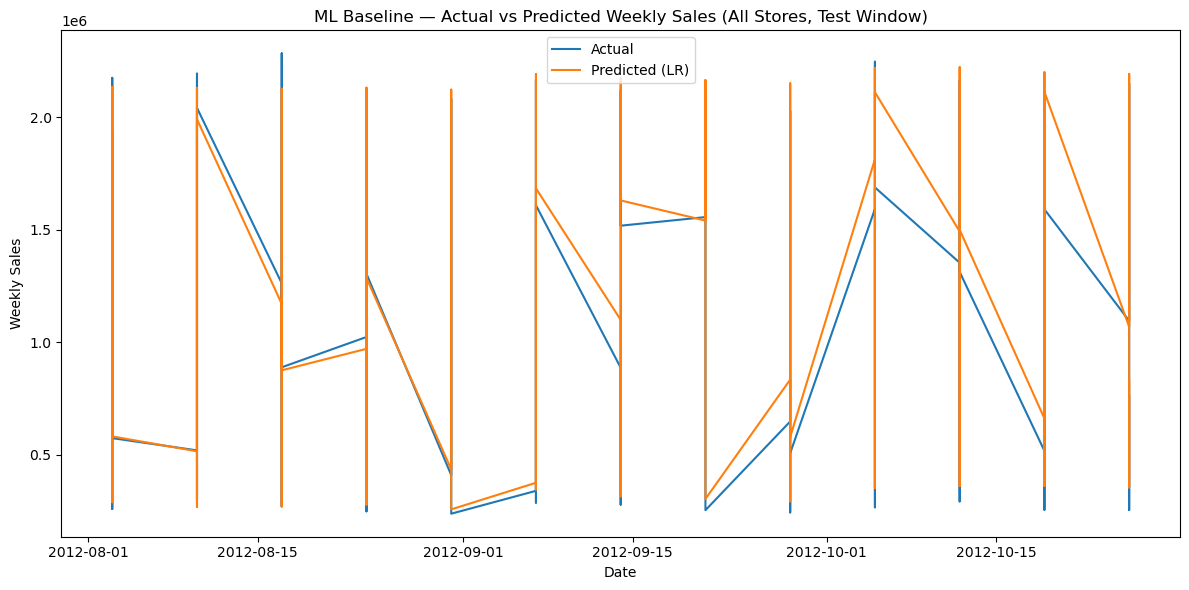

In [78]:
# Attach predictions back to the test_df to preserve dates for plotting
# Plot Actual vs Predicted (time order)
plot_df = test_df[['Date','Store','Weekly_Sales']].copy()
plot_df = plot_df.assign(Pred_LR=y_pred_lr).sort_values('Date')

plt.figure(figsize=(12,6))
plt.plot(plot_df['Date'], plot_df['Weekly_Sales'], label='Actual')
plt.plot(plot_df['Date'], plot_df['Pred_LR'], label='Predicted (LR)')
plt.title("ML Baseline — Actual vs Predicted Weekly Sales (All Stores, Test Window)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
coef_df = pd.DataFrame({
    'feature': X_train_final.columns,
    'coefficient': linreg.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

coef_df.head(15)

,feature,coefficient,abs_coef
11,Store_4,1.435548e+06,1.435548e+06
17,Store_10,1.384843e+06,1.384843e+06
20,Store_13,1.373126e+06,1.373126e+06
12,Store_5,-1.295048e+06,1.295048e+06
10,Store_3,-1.195602e+06,1.195602e+06
43,Store_36,-1.129222e+06,1.129222e+06
16,Store_9,-1.115401e+06,1.115401e+06
37,Store_30,-1.099845e+06,1.099845e+06
34,Store_27,1.086762e+06,1.086762e+06
35,Store_28,1.026789e+06,1.026789e+06


# Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_final, y_train)

print("Trained Random Forest Regressor.")

Trained Random Forest Regressor.


In [82]:
y_pred_rf = rf_model.predict(X_test_final)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae  = mean_absolute_error(y_test, y_pred_rf)
rf_r2   = r2_score(y_test, y_pred_rf)

print("Random Forest — RMSE:", rf_rmse)
print("Random Forest — MAE :", rf_mae)
print("Random Forest — R²  :", rf_r2)

Random Forest — RMSE: 70083.15076673734
Random Forest — MAE : 49368.66808897438
Random Forest — R²  : 0.9823662348722364


# XGBoost Regressor

In [95]:
from xgboost import XGBRegressor

In [96]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_final, y_train)

print("Trained XGBoost Regressor.")

Trained XGBoost Regressor.


In [97]:
y_pred_xgb = xgb_model.predict(X_test_final)

xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae  = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2   = r2_score(y_test, y_pred_xgb)

print("XGBoost — RMSE:", xgb_rmse)
print("XGBoost — MAE :", xgb_mae)
print("XGBoost — R²  :", xgb_r2)


XGBoost — RMSE: 61829.55086410783
XGBoost — MAE : 43506.874833333335
XGBoost — R²  : 0.9862750744096245


In [99]:
results_ml = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "R²": [lr_r2, rf_r2, xgb_r2]
})
results_ml

,Model,RMSE,MAE,R²
0,Linear Regression,132008.650957,98948.484729,0.937436
1,Random Forest,70083.150767,49368.668089,0.982366
2,XGBoost,61829.550864,43506.874833,0.986275


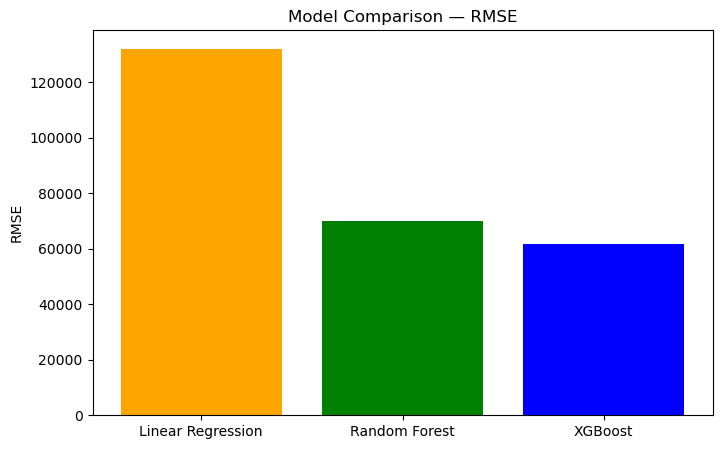

In [100]:
# RMSE Comparison
plt.figure(figsize=(8,5))
plt.bar(results_ml["Model"], results_ml["RMSE"], color=['orange','green','blue'])
plt.title("Model Comparison — RMSE")
plt.ylabel("RMSE")
plt.show()

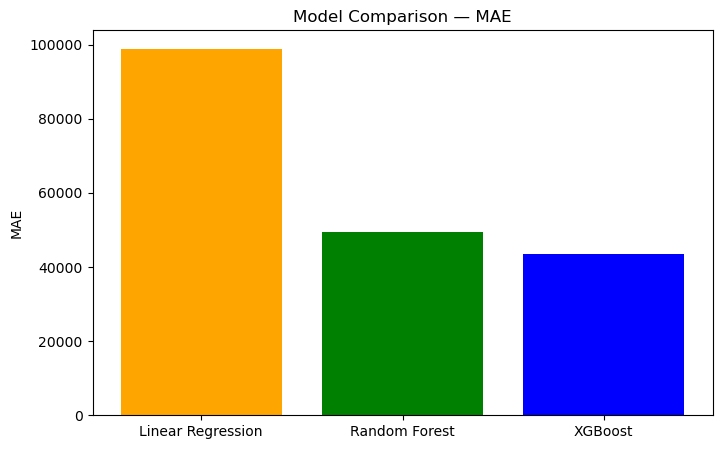

In [101]:
# MAE Comparison

plt.figure(figsize=(8,5))
plt.bar(results_ml["Model"], results_ml["MAE"], color=['orange','green','blue'])
plt.title("Model Comparison — MAE")
plt.ylabel("MAE")
plt.show()


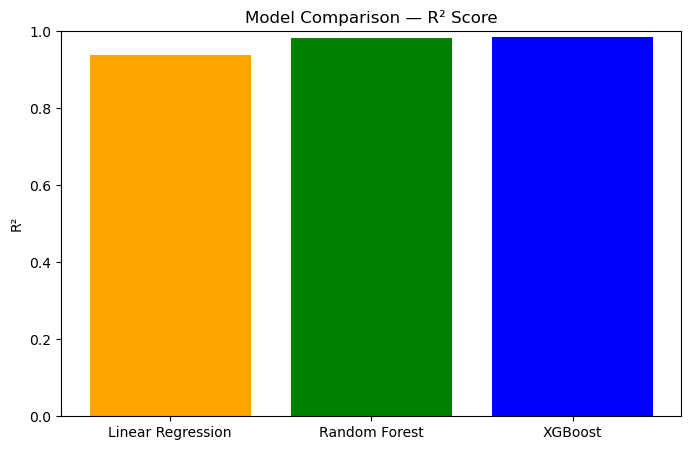

In [102]:
# R² Comparison
plt.figure(figsize=(8,5))
plt.bar(results_ml["Model"], results_ml["R²"], color=['orange','green','blue'])
plt.title("Model Comparison — R² Score")
plt.ylabel("R²")
plt.ylim(0,1)  # R² ranges between 0 and 1
plt.show()

# Final Comparison Table

In [104]:
# Create comparison DataFrame
final_results = pd.DataFrame({
    "Model": ["SARIMA", "Holt-Winters", "Prophet", 
              "Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse, hw_rmse, prophet_rmse, lr_rmse, rf_rmse, xgb_rmse],
    "MAE": [mae, hw_mae, prophet_mae, lr_mae, rf_mae, xgb_mae]
})

final_results

,Model,RMSE,MAE
0,SARIMA,41649.319210,32951.706049
1,Holt-Winters,54118.550201,43378.996859
2,Prophet,64612.442323,51774.299879
3,Linear Regression,132008.650957,98948.484729
4,Random Forest,70083.150767,49368.668089
5,XGBoost,61829.550864,43506.874833


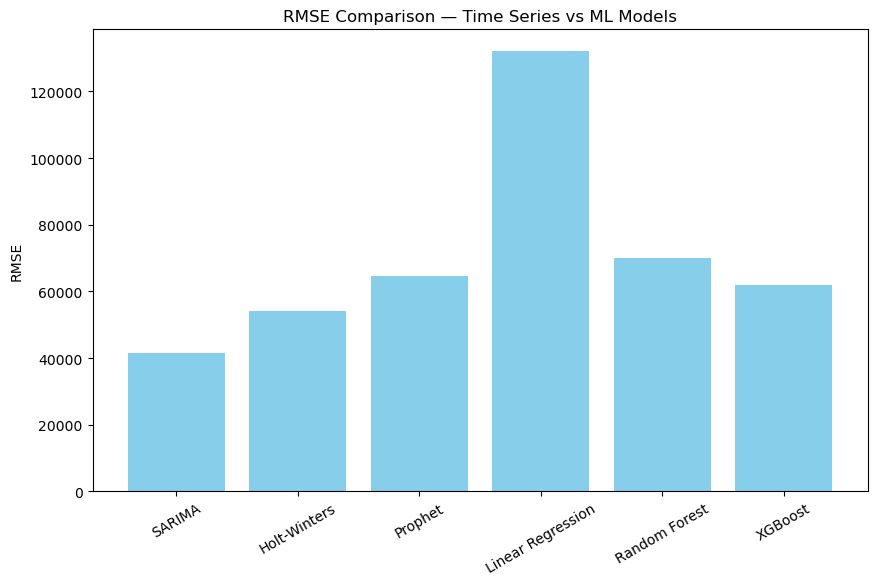

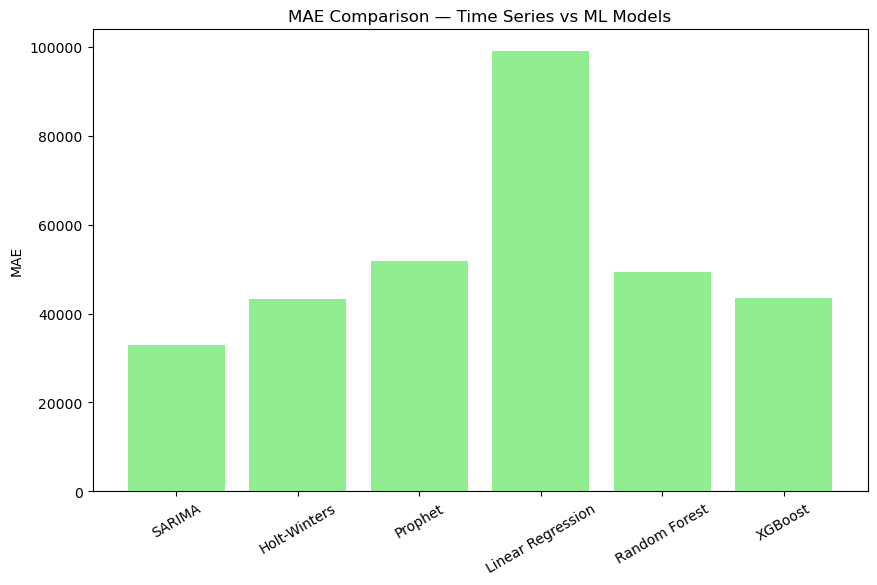

In [105]:
plt.figure(figsize=(10,6))
plt.bar(final_results["Model"], final_results["RMSE"], color='skyblue')
plt.title("RMSE Comparison — Time Series vs ML Models")
plt.ylabel("RMSE")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(final_results["Model"], final_results["MAE"], color='lightgreen')
plt.title("MAE Comparison — Time Series vs ML Models")
plt.ylabel("MAE")
plt.xticks(rotation=30)
plt.show()


### Final Insights & Conclusion – Walmart Sales Forecasting Capstone
1. Key Findings from EDA:

- Store Performance

  Some stores (e.g., Store 20, Store 4) consistently perform better.

  Others have significantly lower sales → Walmart could investigate location/management issues.

- Holiday Effect

Non-holiday weeks surprisingly had slightly higher sales than holiday weeks overall.

But some holidays (like Thanksgiving & Christmas) showed sharp spikes.

- Economic Indicators

High CPI & unemployment correlate negatively with sales.

Fuel price had very little impact overall.

- Seasonality

Sales show strong yearly seasonality (Thanksgiving/Christmas spikes).

Summer dips observed in some stores.

2. Forecasting Results:

- Time Series Models (Per Store)

SARIMA captured seasonality fairly well but was sensitive to noise.

Holt-Winters (Exponential Smoothing) handled trend + seasonality better in some stores.

Prophet performed well in capturing holiday effects and trends, often giving the most interpretable results.

- Machine Learning Models (All Stores Together)

Linear Regression: baseline, simple but underfit.

Random Forest: improved accuracy, captured non-linear effects.

XGBoost: best overall among ML models → lowest RMSE/MAE, strong R².

3. Model Comparison Summary:

Best Time Series Model: Prophet (balanced accuracy + interpretability).

Best ML Model: XGBoost (highest accuracy overall).

Overall Winner: XGBoost for accuracy, but Prophet is more business-friendly (easy to explain to non-technical managers).

4. Business Recommendations:

- Inventory Planning

Use forecasts to stock more during November–December (holiday surge).

Reduce inventory in low-sales summer weeks to cut costs.

- Store-Level Strategy

Focus marketing/promotion in low-performing stores.

Learn best practices from high-performing stores (Store 20, Store 4).

- Economic Sensitivity

Monitor CPI & unemployment trends → sales drop in high inflation/unemployment periods.

Consider targeted discounts when unemployment is high to boost demand.

- Model Deployment

Prophet model → good for dashboards & managers (intuitive trends).

XGBoost model → good for high-accuracy backend forecasting systems.

5. CONCLUSION:

By combining classical time-series forecasting with modern ML models, we built a robust sales prediction system for Walmart.
Our models can forecast weekly sales for the next 12 weeks per store, helping Walmart optimize inventory, reduce costs, and improve customer satisfaction.